In [ ]:
##Process 1: Stepwise

##Reference:
https://github.com/Digya053/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/Part%203%20-%20Training%20Neural%20Networks%20(Solution).ipynb


In [7]:
#Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as tf
from torch import nn



In [ ]:
#Importing helper class
import helper

In [1]:
from torchvision import datasets, transforms

In [3]:
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,),)])


In [8]:
#Download and loading the training data
trainset = datasets.MNIST('~/.pytorch/Mnist_data/', download= True, train= True, transform= transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle= True)


In [12]:
#Building a feedforward network
model = nn.Sequential(
                      nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1)
                     )

In [14]:
#Define the loss function
criterion= nn.NLLLoss()
#Get data
images, labels = next(iter(trainloader))
#Flatten the images
images = images.view(images.shape[0],-1)
#Forward pass, get log-probabilities

logps = model(images)
#Calculate loss with logps and the labels
loss = criterion(logps,labels)
print(loss)


tensor(2.2960, grad_fn=<NllLossBackward0>)


In [15]:
print('Before Backward pass:\n', model[0].weight.grad)

Before Backward pass:
 None


In [16]:
loss.backward()
print("After backward pass:\n", model[0].weight.grad)

After backward pass:
 tensor([[ 0.0038,  0.0038,  0.0038,  ...,  0.0038,  0.0038,  0.0038],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        ...,
        [-0.0031, -0.0031, -0.0031,  ..., -0.0031, -0.0031, -0.0031],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016]])


In [17]:
#Now, training the network
from torch import optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [19]:
print("Initial weight:\n", model[0].weight)

Initial weight:
 Parameter containing:
tensor([[-0.0304, -0.0285, -0.0292,  ..., -0.0149,  0.0022, -0.0045],
        [ 0.0084, -0.0249, -0.0343,  ..., -0.0294, -0.0107,  0.0289],
        [-0.0260, -0.0062, -0.0075,  ..., -0.0114,  0.0195,  0.0087],
        ...,
        [-0.0349, -0.0264, -0.0260,  ..., -0.0190, -0.0304,  0.0241],
        [ 0.0341,  0.0247,  0.0047,  ..., -0.0305,  0.0299,  0.0326],
        [-0.0083,  0.0060,  0.0224,  ...,  0.0244, -0.0123, -0.0077]],
       requires_grad=True)


In [20]:
images, labels = next(iter(trainloader)) 
images.resize_(64,784)

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [21]:
#When you do multiple backwards passes with the same parameters, the gradients are accumulated. 
#This means that you need to zero the gradients on each training pass or you'll retain gradients from previous 
#training batches.

optimizer.zero_grad()
output = model(images)
loss = criterion(output, labels)
loss.backward()
print("Gradient", model[0].weight.grad)


Gradient tensor([[ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        ...,
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


In [22]:
## Take an update step and few the new weights
optimizer.step()
print("Updated weights - ", model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0304, -0.0285, -0.0293,  ..., -0.0149,  0.0022, -0.0045],
        [ 0.0084, -0.0249, -0.0343,  ..., -0.0294, -0.0107,  0.0289],
        [-0.0260, -0.0062, -0.0075,  ..., -0.0114,  0.0195,  0.0087],
        ...,
        [-0.0350, -0.0264, -0.0260,  ..., -0.0190, -0.0304,  0.0241],
        [ 0.0341,  0.0247,  0.0047,  ..., -0.0305,  0.0299,  0.0326],
        [-0.0083,  0.0060,  0.0224,  ...,  0.0244, -0.0123, -0.0077]],
       requires_grad=True)


Training loss: 0.6316079390423892
Training loss: 0.277895759830851
Training loss: 0.21369454951317451
Training loss: 0.17226239126215356
Training loss: 0.14411356424821464


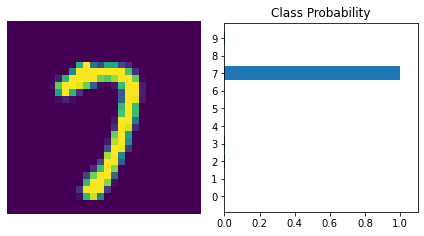

In [25]:
##Summarizing above one 
#training for real
#mplement the training pass for our network. If you implemented it correctly, you should see the training 
#loss drop with each epoch.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as tf
from torch import nn
#Importing helper class
import helper

from torchvision import datasets, transforms
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,),)])

#Download and loading the training data
trainset = datasets.MNIST('~/.pytorch/Mnist_data/', download= True, train= True, transform= transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle= True)


#Building a feedforward network
model = nn.Sequential(
                      nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1)
                     )
#Define the loss function
criterion= nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.03)
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
        
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)